# PCA (Principal Component Analysis)

## 1. Dimensionality reduction

### 1) High-dimensional data

![Image](./images/image1.png)

- Large number of variables $\longrightarrow$ Unnecessary variables exist.
- Hard to express visually
- Increased computational complexity $\longrightarrow$ Modeling is inefficient.
- Therefore, select only important variables. $\longrightarrow$ __Dimensionality reduction__

### 2) Feature Selection/ Feature Extraction

__Feature selection__
<br/>: In machine learning and statistics, __feature selection__, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction.

- Advantages: Easy to interpret selected variables.
- Disadvantages: Difficulties to consider correlations between variables.
- Dimensional reduction through feature selection: Information gain, Lasso, Genetic algorithm ...

__Feature extraction__
<br/> In machine learning, pattern recognition and in image processing, __Feature extraction__ is the transformation of original data to a data set with a reduced number of variables, which contains the most discriminatory information.

- Advantages: Correlations between variables can be considered and in general, the number of variables can be greatly reduced.
- Disadvantages: Difficult to interpret the extracted variables.
- Dimensional reduction through feature extraction: __Principal component analysis(PCA)__, Wavelets transforms, Autoencoder ...

## 2. PCA

<br/>: The data consisting of n samples and p variables is replaced by data consisting of k independent variables. 
<br/>In this case, the reduced variables are generated by linear combination of existing variables.

- Representative analytical methods for effective analysis of high dimensional data.
- PCA is usually used early in the analysis process.
- Applications: Dimensionality reduction, Visualize, Clustering, Compression...


### 1) Purpose

: Find new axes that greatly preserve original data distribution.

Let $Z_i$ be the new variable which is a linear combination of the original p variables in $X=[X_1, X_2,\dots,X_p]\in\mathbb{R}^{n\times p}$.

$$Z_1= \alpha_1^TX=\alpha_{11}X_1+\alpha_{12}X_2+\dots+\alpha_{1p}X_p$$
$$Z_2= \alpha_2^TX=\alpha_{21}X_1+\alpha_{22}X_2+\dots+\alpha_{2p}X_p$$
$$\vdots$$
$$Z_p= \alpha_p^TX=\alpha_{p1}X_1+\alpha_{p2}X_2+\dots+\alpha_{pp}X_p$$

Fiture1. Example
![Image](./images/image2.png)

In the above example, when projecting data on two axes, the amount of information lost (large variance) is smaller in $Z_1$ which __maximizes the variance__ of data.

### 2) Mathematical setting

Let $\bar{X}$ be a mean matrix such that $\bar{X}=\begin{bmatrix}\bar{x_1}\\\bar{x_2}\\ \vdots \\ \bar{x_p}\end{bmatrix}$ where $\bar{x_i}=\frac{1}{n}\sum_{j=0}^n x_{ji}[1,\dots,1]\in\mathbb{R}^{1\times n}$.

Then the covariance matrix $Cov(X)$ is
\begin{equation}
\begin{split}
Cov(X)
&=\frac{1}{n}(X-\bar{X})^T(X-\bar{X})\\
&
\end{split}
\end{equation}


__Note 1__

In probability theory and statistics,

Covariance $cev_{XY}=\sigma_{XY}=E[(X-\mu_X)(Y-\mu_Y)]$

Correlation $corr_{XY}=\rho_{XY}=\frac{E[(X-\mu_X)(Y-\mu_Y)]}{\rho_X\rho_Y}=\frac{cov_{XY}}{\rho_X\rho_Y}.$


Assume that we have the centered data$(i.e., \bar{X}=0)$ and $\alpha$ be an $p$-dimensional vector of length one($i.e., \alpha^T\alpha=1$) such that $Z=X\alpha$.

Fiture 2. The centered data
![Image](./images/image3.png)

Let denote the covariance matrix by $\frac{1}{n}X^TX=\sum$.

Then the __main purpose in PCA__ is __to find $\alpha$ that produces the largest variance of $Z$__

\begin{matrix} max_\alpha& Var(Z)=\alpha^TVar(X)\alpha=\alpha^T\sum\alpha\\  
subject\ to & \alpha^T\alpha=1
\end{matrix}


By eigenvalue decomposition of $\sum$,

\begin{matrix} max_\alpha& \alpha^T\sum\alpha = \alpha^TE\Lambda E^T\alpha\\  
subject\ to & \alpha^T\alpha=1
\end{matrix}

where $\Lambda=$diag$(\lambda_1, \dots, \lambda_m)$ with $\lambda_1\ge\lambda_2\ge\dots\ge\lambda_m>0$.

It can be represented by

\begin{matrix} max_\beta& \beta^T\Lambda \beta\\  
subject\ to & \beta^T\beta=1
\end{matrix}

where $\beta=E^T\alpha$.

__Note 2__

The above problem can be solved by solving the Lagrange dual problem. The Lagrange dual problem of the above problem is

\begin{matrix} max_{\beta,\eta} & L(\beta,\eta)=-\beta^T\Lambda\beta+\eta(\beta^T\beta-1)\\
subject\ to & \eta\ge0
\end{matrix}

\begin{equation}
\begin{split}
\frac{\partial L}{\partial \eta}
&=-(\Lambda+\Lambda^T)\beta+2\eta\beta\\
&=-2\Lambda\beta+2\eta\beta\\
&=0
\end{split}
\end{equation}

Thus, $\Lambda\beta=\eta\beta$ and the problem is

\begin{matrix} max_\eta & L(\eta)=-\eta(\beta^T\beta)+\eta(\beta^T\beta-1)=\eta\\
subject\ to & \eta\ge0
\end{matrix}


\begin{matrix} max_{\beta}& \lambda_1\beta_1^2+\lambda_2\beta_2^2+\dots+\lambda_m\beta_m^2\\  
subject\ to & \beta_1^2+\beta_2^2+\dots+\beta_m^2=1\\
& \lambda_1\ge\lambda_2\ge\dots\ge\lambda_m
\end{matrix}

The solution of the above problem is $\lambda_1$ when $\beta=e_1=[1,0,\dots,0]$. 

Then $\alpha_1=E^T\beta$ is the eigenvector of $\sum$ with respect to $\lambda_1$ and so $Z_1(=PC1)=X\alpha_1$ .

Figure 3. Data representation using PC1.
![Image](./images/image4.png)

Figure 3. Data representation using PC1 and PC2.
![Image](./images/image5.png)

__Note 2__

The above problem can be solved by solving the Lagrange dual problem. The Lagrange dual problem of the above problem is

\begin{matrix} min_\eta & L(\eta)=\alpha^T\
subject\ to & \alpha^T\alpha=1
\end{matrix}


## 3) Pseudo Code

(Step1) Mean centering

(Step2) Calculateion of Covariance matrix($\frac{1}{n}\sum=X^TX$) of data.

(Step3) Calculation of eigenvalues and eigenvectors of covariance matrix $\sum$.

(Step4) Mathematical representations of transformation of axes.

### 4) Example

In [61]:
import pandas as pd
example_data=pd.read_csv("secu_com_finance_2007.csv", encoding='cp949', index_col=0)
example_data.head()

,V1(net income to total assets ratio),V2(net income to stockholders’equity),V3(the ratio of owner's equity),V4(debt ratio),V5(the turnover of net worth)
company,,,,,
SK증권,2.43,11.10,18.46,441.67,0.90
교보증권,3.09,9.95,29.46,239.43,0.90
대신증권,2.22,6.86,28.62,249.36,0.69
대우증권,5.76,23.19,23.47,326.09,1.43
동부증권,1.60,5.64,25.64,289.98,1.42


Figure 4. Results of PCA: Weiths
![Image](./images/image6.png)
$$\Updownarrow$$
Figure 5. Results of PCA: New axes
![Image](./images/image8.png)



Figure 6. Result Analysis
![Image](./images/image7.png)


## 3.Code using numpy

### 1) Data: Iris

In [1]:
import pandas as pd
data=pd.read_csv("iris.csv")
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [2]:
x_data=data[['sepal.length','sepal.width','petal.length','petal.width']].values
y_data=data['variety'].values

In [3]:
type(x_data)

numpy.ndarray

In [4]:
x_data.shape

(150, 4)

### 2) Mean Centering

In [5]:
import numpy as np

In [6]:
mean_vector=np.mean(x_data,axis=0)
mean_vector

array([5.84333333, 3.05733333, 3.758     , 1.19933333])

In [7]:
centered_x=x_data-mean_vector
#centered_x

### 3) Calculateion of Covariance matrix($\frac{1}{n}\sum=X^TX$) of data

In [8]:
cov_matrix=np.dot(centered_x.T,centered_x)/(x_data.shape[0]-1)

In [9]:
cov_matrix

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

### 4) Calculation of eigenvalues and eigenvectors of covariance matrix $\sum$.

In [10]:
w,v=np.linalg.eig(cov_matrix)

In [11]:
print("w:{}\nv:{}".format(w,v))

w:[4.22824171 0.24267075 0.0782095  0.02383509]
v:[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


### 5) Mathematical representations of transformation of axes.

In [12]:
Z=np.dot(centered_x,v[:,:2])

In [13]:
Z.shape

(150, 2)

### 6) Ploting and comparing

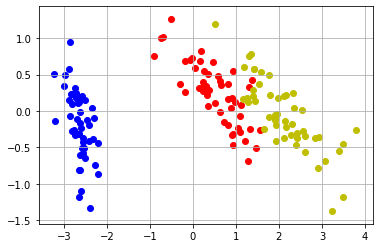

Explained variance of Z[:,0]:4.2001
Explained variance of Z[:,1]:0.2411
Explained variance Ratio: 0.9777 


In [15]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(Z[y_data=='Setosa'][:,0], Z[y_data=="Setosa"][:,1], c='b')
plt.scatter(Z[y_data=='Versicolor'][:,0], Z[y_data=="Versicolor"][:,1], c='r')
plt.scatter(Z[y_data=='Virginica'][:,0], Z[y_data=="Virginica"][:,1], c='y')
plt.grid()
plt.show()
print("Explained variance of Z[:,0]:{:.4f}\nExplained variance of Z[:,1]:{:.4f}\nExplained variance Ratio: {:.4f} ".
      format(np.var(Z[:,0]),
             np.var(Z[:,1]),
             (np.var(Z[:,0])+np.var(Z[:,1]))/np.sum(np.var(x_data,axis=0))))

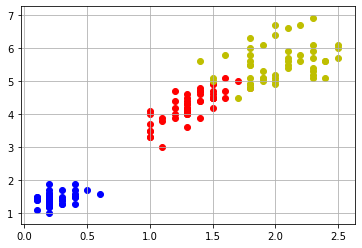

Explained variance of x_data[:,3]:0.5771
Explained variance of x_data[:,2]:3.0955
Explained variance Ratio: 0.8085 


In [16]:
plt.figure()
plt.scatter(x_data[y_data=='Setosa'][:,3], x_data[y_data=="Setosa"][:,2], c='b')
plt.scatter(x_data[y_data=='Versicolor'][:,3], x_data[y_data=="Versicolor"][:,2], c='r')
plt.scatter(x_data[y_data=='Virginica'][:,3], x_data[y_data=="Virginica"][:,2], c='y')
plt.grid()
plt.show()
print("Explained variance of x_data[:,3]:{:.4f}\nExplained variance of x_data[:,2]:{:.4f}\nExplained variance Ratio: {:.4f} ".
      format(np.var(x_data[:,3]),
             np.var(x_data[:,2]),
             (np.var(x_data[:,3])+np.var(x_data[:,2]))/np.sum(np.var(x_data,axis=0))))

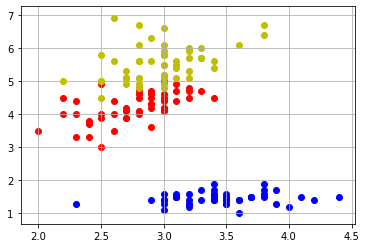

Explained variance of x_data[:,1]:0.1887
Explained variance of x_data[:,2]:3.0955
Explained variance Ratio: 0.7230 


In [17]:
plt.figure()
plt.scatter(x_data[y_data=='Setosa'][:,1], x_data[y_data=="Setosa"][:,2], c='b')
plt.scatter(x_data[y_data=='Versicolor'][:,1], x_data[y_data=="Versicolor"][:,2], c='r')
plt.scatter(x_data[y_data=='Virginica'][:,1], x_data[y_data=="Virginica"][:,2], c='y')
plt.grid()
plt.show()
print("Explained variance of x_data[:,1]:{:.4f}\nExplained variance of x_data[:,2]:{:.4f}\nExplained variance Ratio: {:.4f} ".
      format(np.var(x_data[:,1]),
             np.var(x_data[:,2]),
             (np.var(x_data[:,1])+np.var(x_data[:,2]))/np.sum(np.var(x_data,axis=0))))

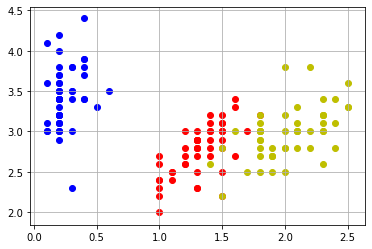

Explained variance of x_data[:,3]:0.5771
Explained variance of x_data[:,1]:0.1887
Explained variance Ratio: 0.1686 


In [18]:
plt.figure()
plt.scatter(x_data[y_data=='Setosa'][:,3], x_data[y_data=="Setosa"][:,1], c='b')
plt.scatter(x_data[y_data=='Versicolor'][:,3], x_data[y_data=="Versicolor"][:,1], c='r')
plt.scatter(x_data[y_data=='Virginica'][:,3], x_data[y_data=="Virginica"][:,1], c='y')
plt.grid()
plt.show()
print("Explained variance of x_data[:,3]:{:.4f}\nExplained variance of x_data[:,1]:{:.4f}\nExplained variance Ratio: {:.4f} ".
      format(np.var(x_data[:,3]),
             np.var(x_data[:,1]),
             (np.var(x_data[:,3])+np.var(x_data[:,1]))/np.sum(np.var(x_data,axis=0))))

## 4. Code using sklearn

In [19]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [20]:
pca = PCA(n_components=2)
pca.fit(x_data)
a=pca.explained_variance_ratio_
b=pca.components_

In [172]:
a

array([0.92461872, 0.05306648])

In [173]:
b

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])